<a href="https://colab.research.google.com/github/d0bando/PersonalProjects/blob/main/elegibilidad_para_pr%C3%A9stamos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
#!pip install lazypredict
#!pip freeze > requirements.txt

# **Clasificación de elegibilidad para préstamos**

### Proyecto de Aprendizaje Automático Aplicado: Análisis Predictivo
by Felipe Obando

<img src='https://solodinero.com/wp-content/uploads/sites/8/2022/06/prestamo_personal_shutterstock_267652751.jpg?resize=1316,740&quality=80'>

## **[Entendimiento del negocio]**

La empresa Dream Housing Finance se especializa en brindar préstamos para vivienda, abarcando áreas urbanas, semiurbanas y rurales. Antes de conceder un préstamo, la empresa valida la elegibilidad del cliente.

Con el objetivo de agilizar y automatizar el proceso de evaluación de elegibilidad, la empresa busca implementar un sistema en tiempo real que analice los detalles proporcionados por los clientes al completar la solicitud en línea. Estos detalles incluyen información sobre género, estado civil, nivel educativo, número de dependientes, ingresos, cantidad solicitada, historial crediticio, entre otros.

Para llevar a cabo este proceso de manera eficiente, se plantea el desafío de identificar segmentos de clientes y determinar el monto máximo de préstamo al que cada segmento puede acceder. De esta manera, la empresa podrá dirigir sus esfuerzos de manera específica hacia aquellos clientes que cumplan con los requisitos establecidos.

## **[Entendimiento de datos]**

Dataset: https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset?select=loan-train.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading data
df = pd.read_csv('loan-train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


A continuación se presenta la información sobre las columnas del dataframe:

- **Loan_ID**: ID único del préstamo.
- **Gender**: Género (Masculino/Femenino).
- **Married**: Estado civil del prestatario (Sí/No).
- **Dependents**: Número de dependientes del prestatario.
- **Education**: Nivel educativo del prestatario (Graduado/No graduado).
- **Self_Employed**: Estado de empleo propio (Sí/No).
- **ApplicantIncome**: Ingresos del prestatario.
- **CoapplicantIncome**: Ingresos del co-solicitante del préstamo.
- **LoanAmount**: Cantidad del préstamo (en miles).
- **Loan_Amount_Term**: Plazo del préstamo (en meses).
- **Credit_History**: Historial crediticio que cumple con las pautas {1:'Bueno', 0:'Malo'}.
- **Property_Area**: Área de la propiedad (Urbana/Semi-urbana/Rural).
- **Loan_Status**: Estado de aprobación del préstamo (Sí/No).

### Análisis exploratorio de datos: Estadística descriptiva

In [ ]:
#Number of rows and columns in the dataframe
df.shape

(614, 13)

In [ ]:
#Check some data samples
df.sample(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
150,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural,N
406,LP002308,Male,Yes,0,Not Graduate,No,2167,2400.0,115.0,360.0,1.0,Urban,Y
288,LP001931,Female,No,0,Graduate,No,4124,0.0,115.0,360.0,1.0,Semiurban,Y
66,LP001228,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,N


In [ ]:
#Check the number of Non-Null values and the data type in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#Number of null values in each column
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Check for duplicate data
df[df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
# Checking unique values for several columns with categorical data representation
cat_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
           'Loan_Amount_Term', 'Property_Area', 'Loan_Status']
for col in cat_col:
    unique_values = df[col].unique()
    print(f'Unique values in column {col}: {unique_values}')

Unique values in column Gender: ['Male' 'Female' nan]
Unique values in column Married: ['No' 'Yes' nan]
Unique values in column Dependents: ['0' '1' '2' '3+' nan]
Unique values in column Education: ['Graduate' 'Not Graduate']
Unique values in column Self_Employed: ['No' 'Yes' nan]
Unique values in column Loan_Amount_Term: [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Unique values in column Property_Area: ['Urban' 'Rural' 'Semiurban']
Unique values in column Loan_Status: ['Y' 'N']


In [ ]:
#Descriptive statistics (before data preparation) for columns with numeric data types
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#Descriptive statistics (before data preparation) for columns with object data types
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Algunas informaciones que se pueden obtener de la etapa de Estadística Descriptiva anterior son:
- El conjunto de datos consta de 614 filas y 13 columnas (5 columnas con tipo de datos numéricos y 8 columnas con tipo de datos objeto).
- Hay algunas columnas que tienen valores faltantes, como 'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount' y 'Credit_History'. Por lo tanto, se requiere un proceso de manejo de valores faltantes.
- No hay datos duplicados en el conjunto de datos.
- Sería recomendable realizar cambios en el tipo de datos de algunas columnas a *entero*, como 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' y 'Credit_History'.
- Antes de realizar el modelado, se puede eliminar la columna 'Loan_ID' ya que no es necesaria.

### Análisis exploratorio de datos: análisis univariado

#### **Datos categóricos**

In [ ]:
#Make a copy of the dataframe to facilitate Univariate Analysis
df2 = df.copy()
df2 = df2.fillna('Missing')

In [ ]:
def plot_categorical_column(df, column):
    """
    Plot a categorical column from a DataFrame as a bar chart.

    Args:
        df (DataFrame): The DataFrame containing the data.
        column (str): The name of the categorical column to plot.
    """

    sns.set(style="whitegrid")

    # Calculate the percentages of each category
    percentage = 100 * df[column].value_counts(normalize=True)

    # Create a bar chart using seaborn
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='Set2')

    # Add labels with count and percentage on each bar
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{height}\n({percentage[i]:.1f}%)', ha='center', fontweight='bold')

    # Set axis limits
    ax.set_ylim(0, df[column].value_counts().max() + 50)

    # Set labels and title of the chart
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'Count Plot for \'{column}\'', fontsize=14)

    # Show the chart
    plt.show()


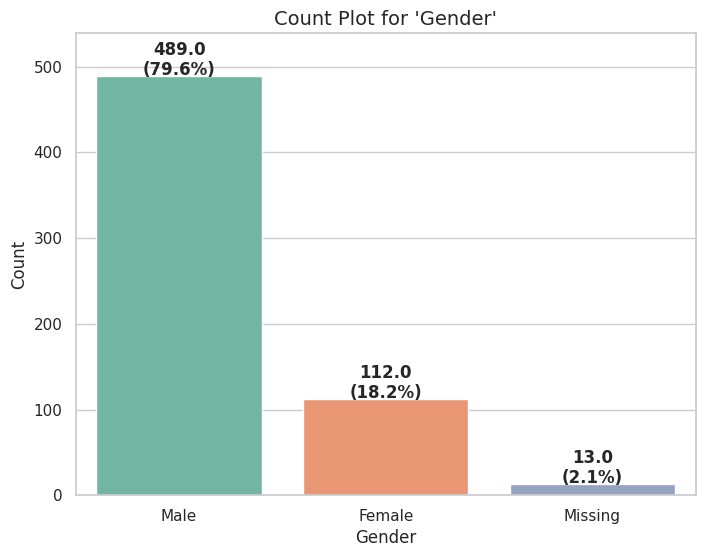

In [ ]:
plot_categorical_column(df2, 'Gender')

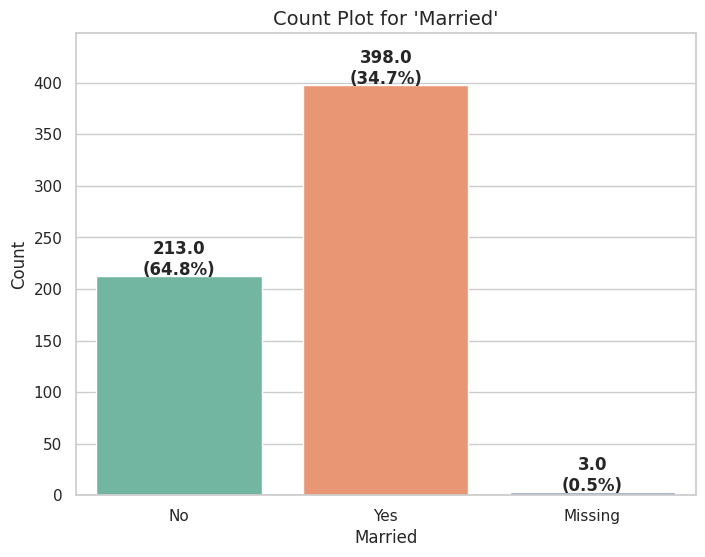

In [ ]:
plot_categorical_column(df2, 'Married')

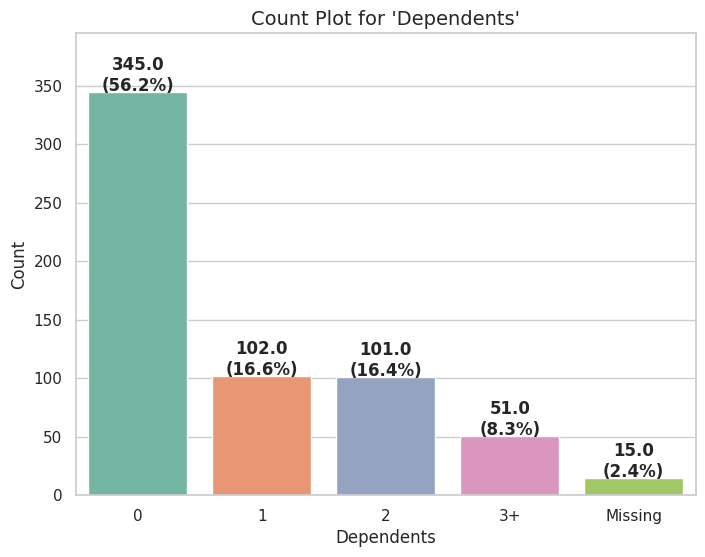

In [ ]:
plot_categorical_column(df2, 'Dependents')

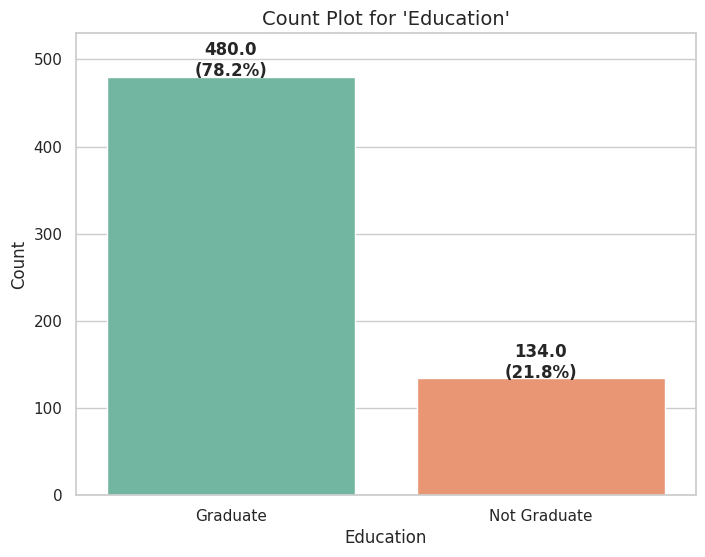

In [ ]:
plot_categorical_column(df2, 'Education')

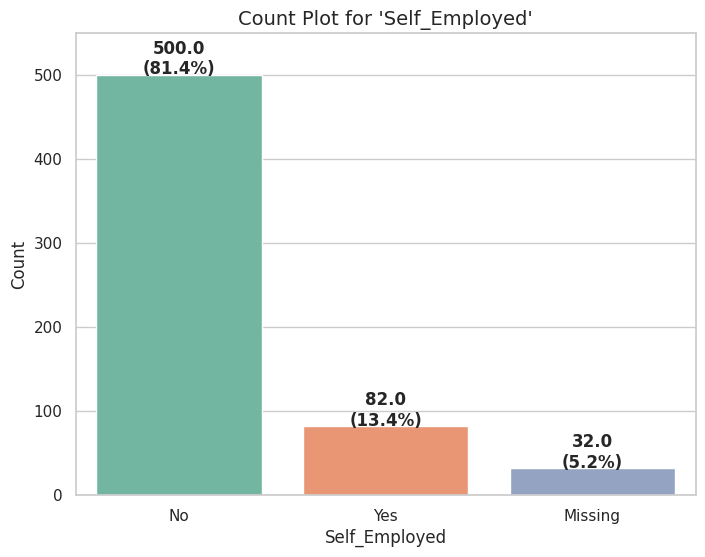

In [ ]:
plot_categorical_column(df2, 'Self_Employed')

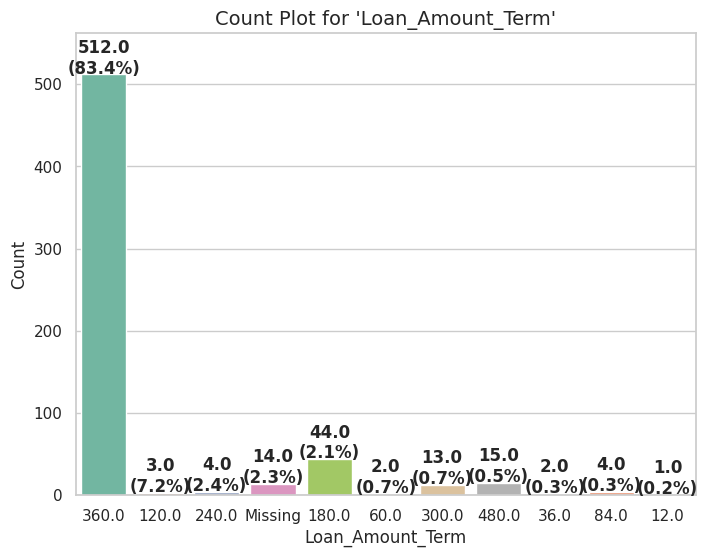

In [ ]:
plot_categorical_column(df2, 'Loan_Amount_Term')

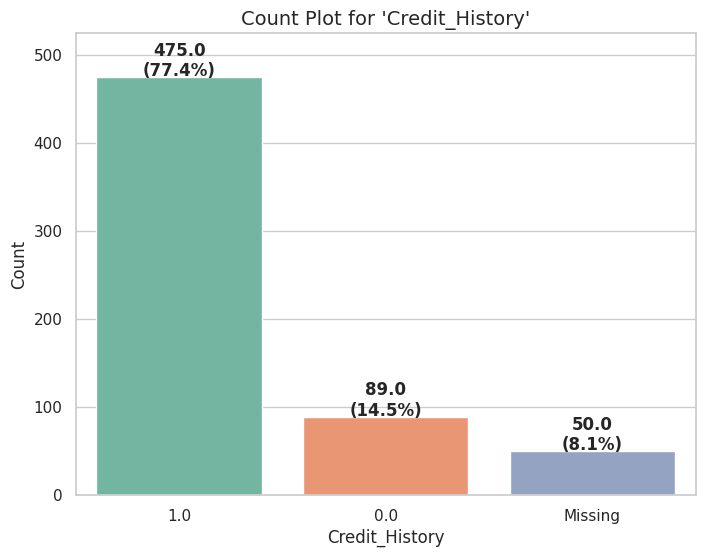

In [ ]:
plot_categorical_column(df2, 'Credit_History')

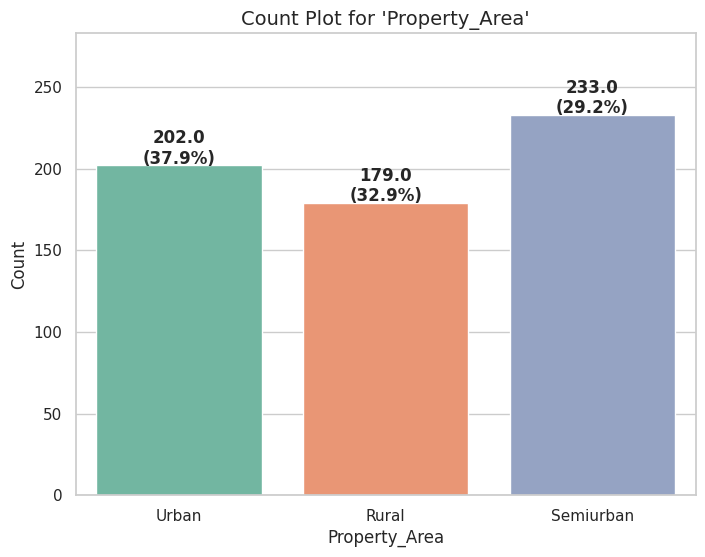

In [ ]:
plot_categorical_column(df2, 'Property_Area')

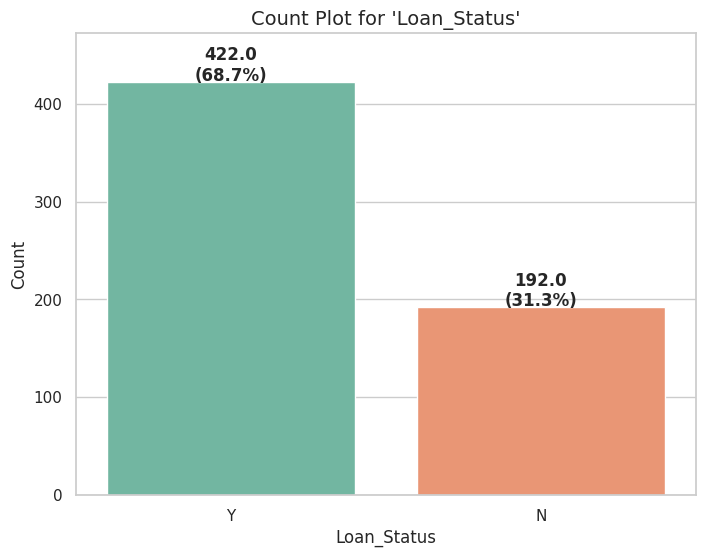

In [ ]:
plot_categorical_column(df2, 'Loan_Status')

#### **Datos numéricos**

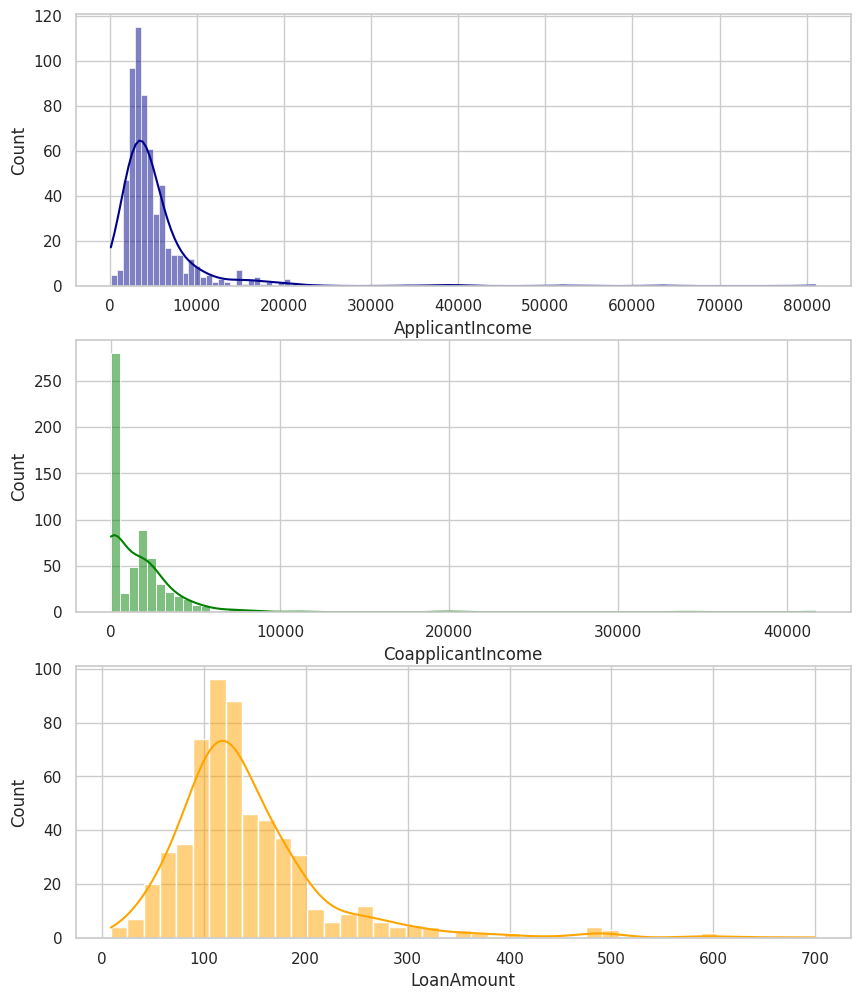

In [ ]:
# Create histograms to visualize the data distribution in numerical columns
sns.set_style('whitegrid')
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

sns.histplot(data=df, x='ApplicantIncome', kde=True, ax=ax[0], color='darkblue')
sns.histplot(data=df, x='CoapplicantIncome', kde=True, ax=ax[1], color='green')
sns.histplot(data=df, x='LoanAmount', kde=True, ax=ax[2], color='orange')

plt.show()

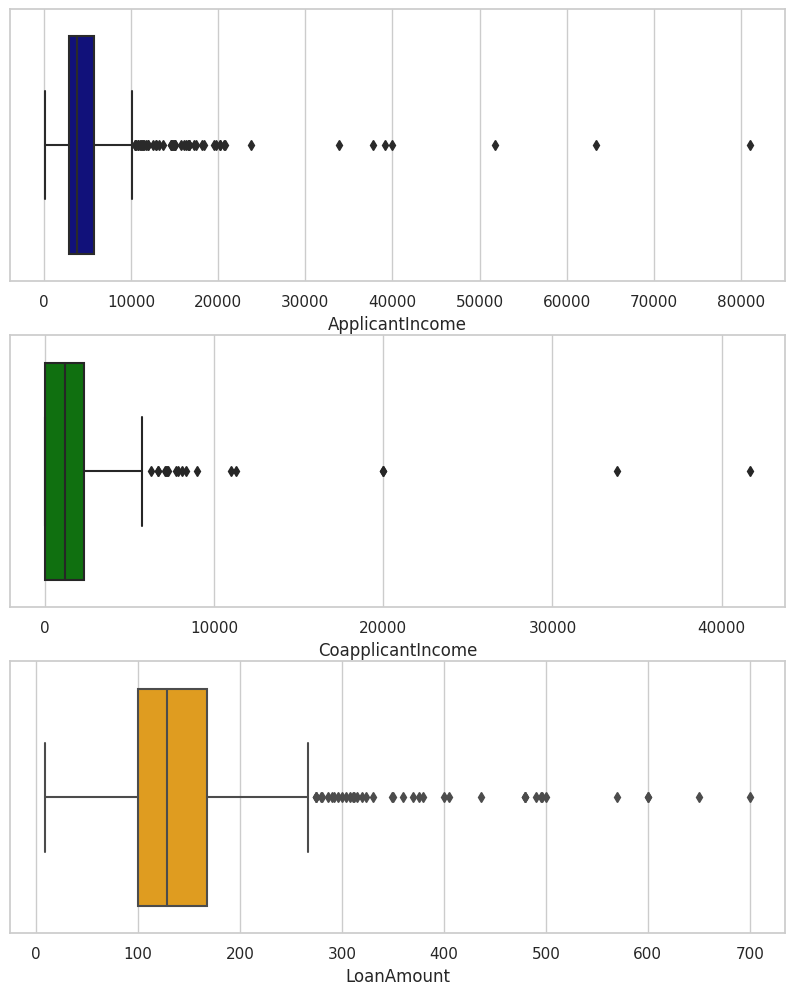

In [ ]:
# Create box plots to detect outliers in numerical columns
sns.set_style('whitegrid')
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

sns.boxplot(x=df['ApplicantIncome'], ax=ax[0], color='darkblue')
sns.boxplot(x=df['CoapplicantIncome'], ax=ax[1], color='green')
sns.boxplot(x=df['LoanAmount'], ax=ax[2], color='orange')

plt.show()

Algunas de las informaciones que se pueden obtener de la etapa de Análisis Univariable anterior son:
- En general, para las columnas con datos categóricos, casi todas las columnas tienen una categoría dominante que se muestra con un porcentaje >50%. Específicamente, para la columna 'Loan_Status', la proporción de sus categorías es de 69:31 (desequilibrio), lo que significa que se debe aplicar un tratamiento especial para evitar que el modelo creado tenga una predicción excesiva hacia una categoría en particular.
- Hay valores atípicos en las columnas con datos numéricos, es decir, las columnas 'ApplicantIncome', 'CoapplicantIncome' y 'LoanAmount'. Se llevará a cabo el proceso de **manejo de valores atípicos** en la etapa de *preparación de datos*.


### Análisis exploratorio de datos: análisis multivariado

#### **Datos categóricos**

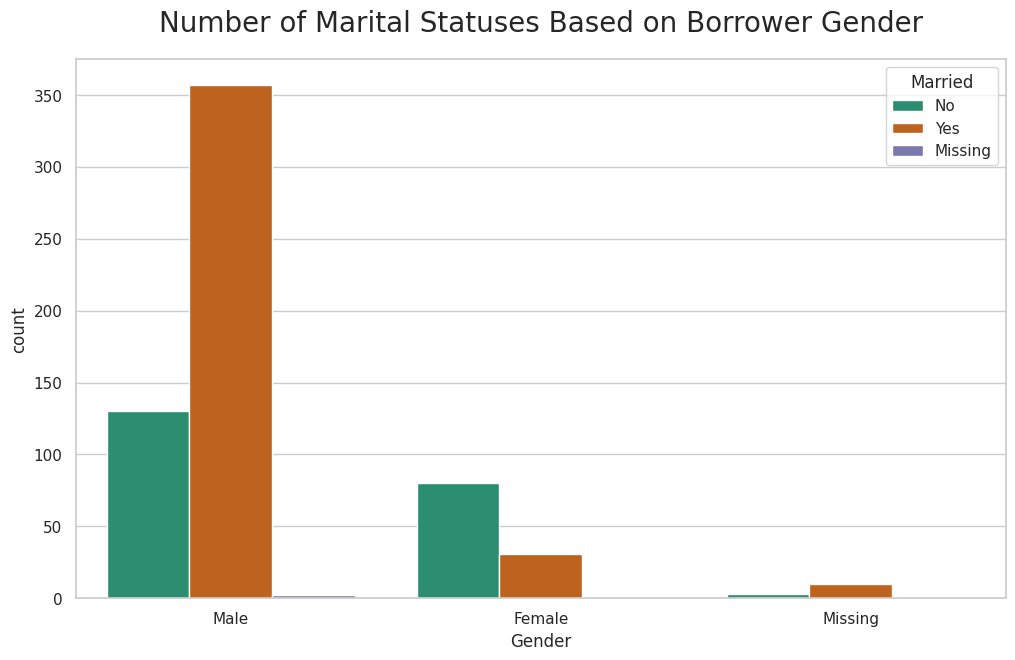

In [ ]:
# View the number of marital statuses based on borrower gender
plt.figure(figsize=(12, 7))
sns.countplot(x='Gender', data=df2, hue='Married', palette='Dark2')
plt.title('Number of Marital Statuses Based on Borrower Gender',
          pad=20, fontsize=20)
plt.legend(title='Married', loc='upper right')
plt.show()

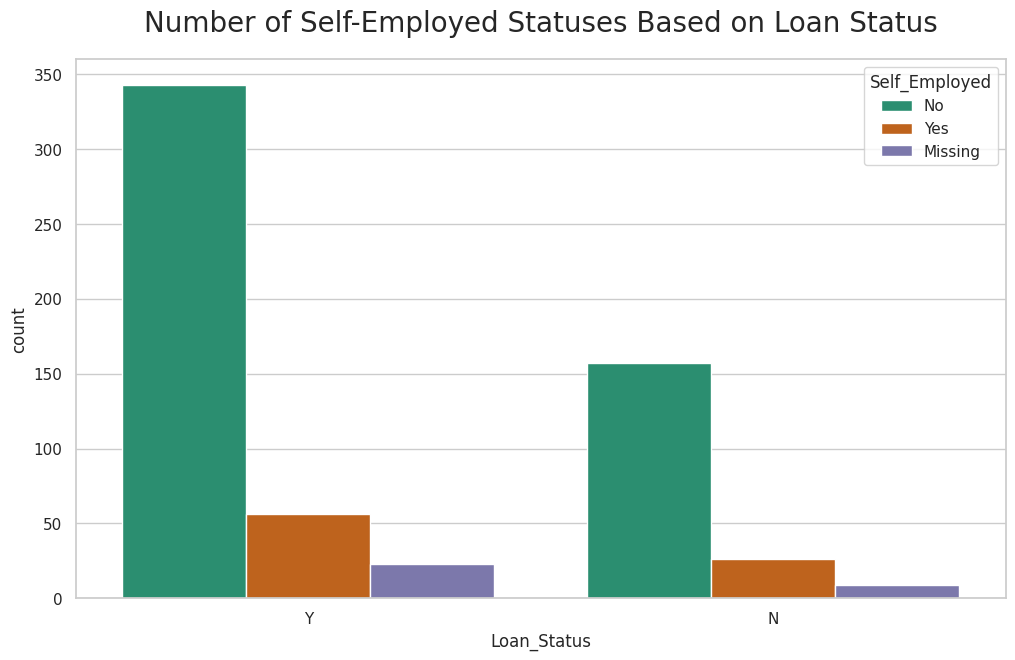

In [ ]:
# View the number of self-employed statuses based on loan status
plt.figure(figsize=(12, 7))
sns.countplot(x='Loan_Status', data=df2, hue='Self_Employed', palette='Dark2')
plt.title('Number of Self-Employed Statuses Based on Loan Status',
          pad=20, fontsize=20)
plt.show()

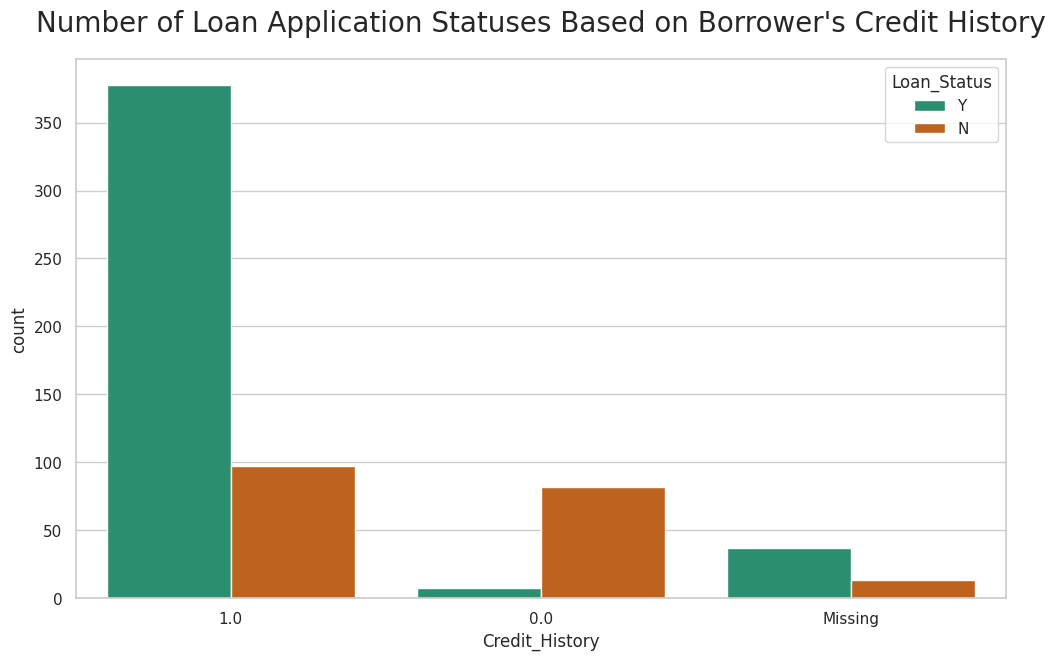

In [ ]:
# View the number of loan application statuses based on borrower's credit history
plt.figure(figsize=(12, 7))
sns.countplot(x='Credit_History', data=df2, hue='Loan_Status', palette='Dark2')
plt.title('Number of Loan Application Statuses Based on Borrower\'s Credit History',
          pad=20, fontsize=20)
plt.show()

#### **Datos numéricos**

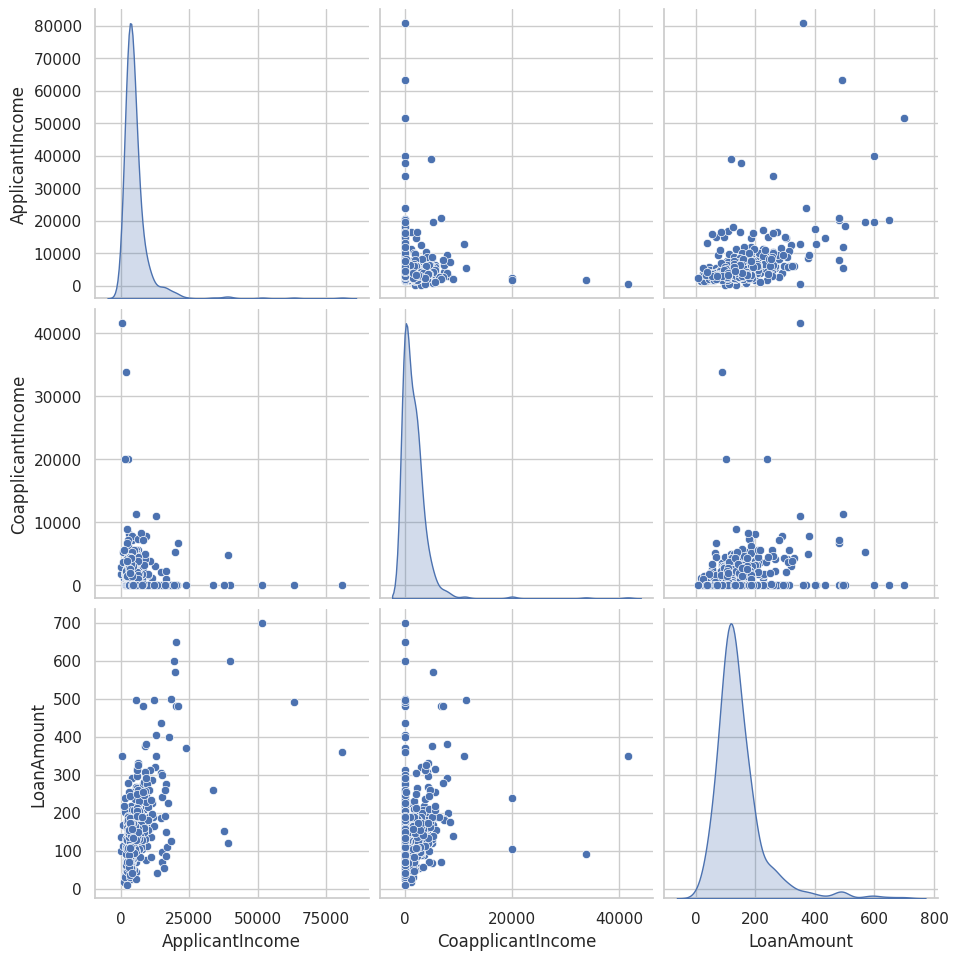

In [ ]:
df_num = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

# View the distribution in several columns with numerical data types
sns.pairplot(df_num, diag_kind='kde')
plt.gcf().set_size_inches(10, 10)
plt.show()

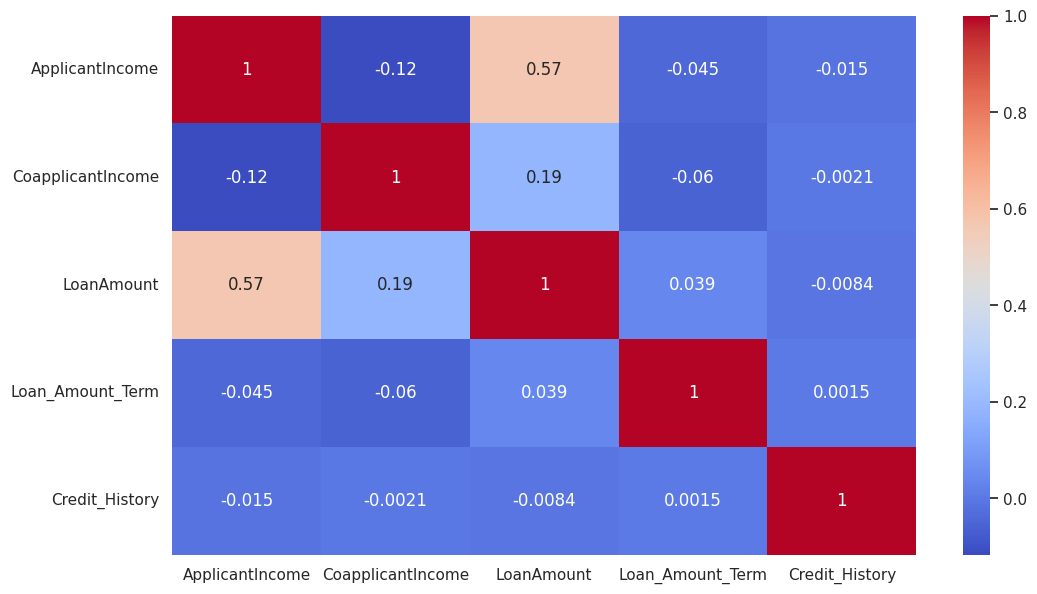

In [ ]:
# Create a heatmap of correlation between numerical variables
plt.figure(figsize=(12, 7))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')
plt.show()


Algunas de las informaciones que se pueden obtener de la etapa de Análisis Multivariable anterior son:
- Para los prestatarios de género masculino, predominan aquellos que están casados. Esto contrasta con los prestatarios de género femenino. Por lo tanto, los valores faltantes en la columna de género se llenarán con 'Masculino' debido a su similitud con el género masculino en términos de estado civil.
- Los prestatarios con un historial crediticio deficiente tienden a tener sus solicitudes de préstamo rechazadas. Debido a que los valores faltantes en el historial crediticio están dominados por aquellos que han sido aceptados para préstamos, estos valores faltantes se llenarán con el valor 1 (Bueno).
- Existe una correlación moderada entre la columna 'LoanAmount' y 'ApplicantIncome'.


## **[Preparación de datos]**

#### **Manejo de valores faltantes**

In [ ]:
df['Married'].mode()[0]

'Yes'

In [ ]:
# Handling missing values for categorical columns
df['Gender'].fillna('Male', inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

# Handling missing values for numerical columns
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Credit_History'].fillna(1.0, inplace=True)

In [ ]:
#Recheck the number of missing values in each column
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### **Cambiar el tipo de datos**

In [ ]:
# Changing data types of selected columns
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype('int64')
df['LoanAmount'] = df['LoanAmount'].astype('int64')
df['Credit_History'] = df['Credit_History'].astype('int64')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int64')

# Reverting the data type of the 'Loan_Amount_Term' column to object
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('object')

In [ ]:
#Recheck the Non-Null value and data type in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    object
 2   Married            614 non-null    object
 3   Dependents         614 non-null    object
 4   Education          614 non-null    object
 5   Self_Employed      614 non-null    object
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int64 
 8   LoanAmount         614 non-null    int64 
 9   Loan_Amount_Term   614 non-null    object
 10  Credit_History     614 non-null    int64 
 11  Property_Area      614 non-null    object
 12  Loan_Status        614 non-null    object
dtypes: int64(4), object(9)
memory usage: 62.5+ KB


#### **Manejo de valores atípicos**

In [ ]:
#handling outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR= Q3-Q1

df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

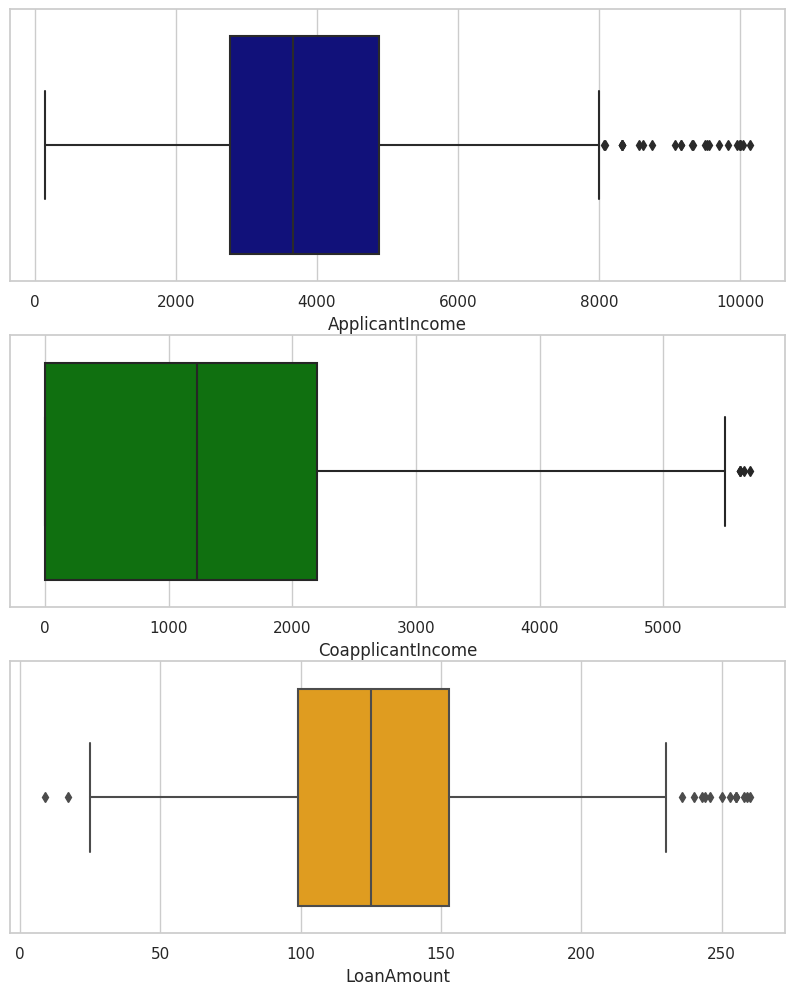

In [ ]:
# View the boxplots for columns with numerical data (after handling outliers)
sns.set_style('whitegrid')
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

sns.boxplot(x=df['ApplicantIncome'], ax=ax[0], color='darkblue')
sns.boxplot(x=df['CoapplicantIncome'], ax=ax[1], color='green')
sns.boxplot(x=df['LoanAmount'], ax=ax[2], color='orange')
plt.show()

In [ ]:
#review the number of rows and columns (after handling outliers)
df.shape

(457, 13)

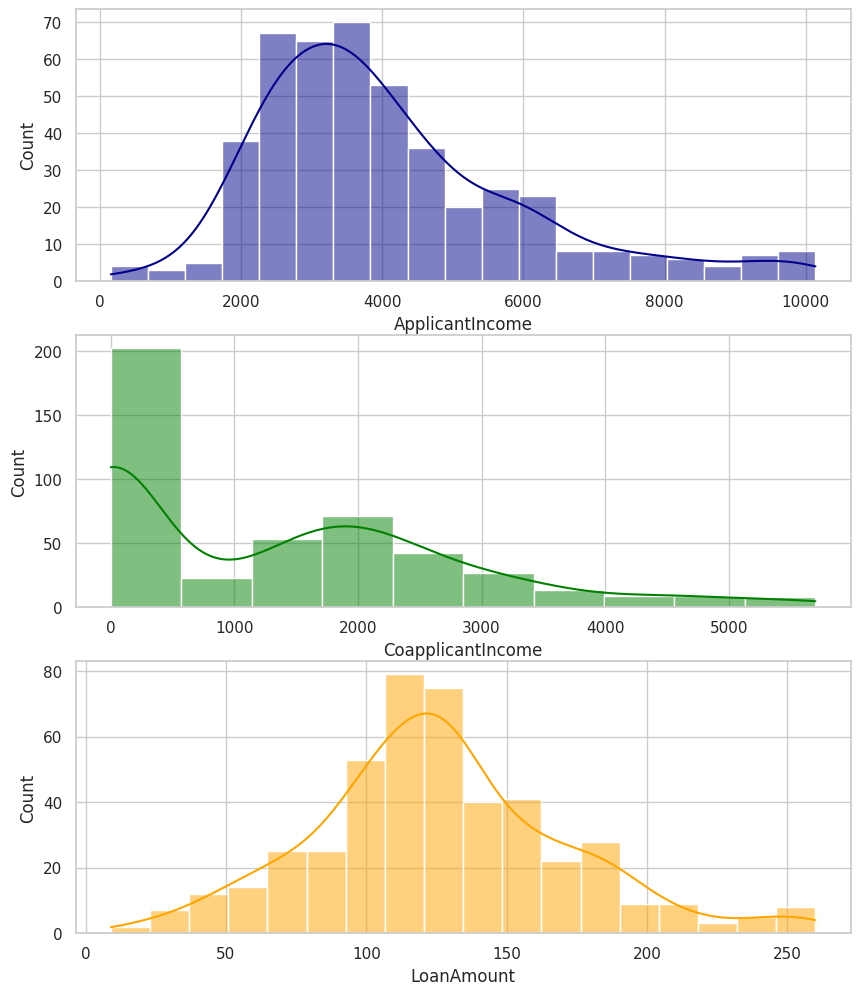

In [ ]:
# View the distribution of data in numerical columns (after handling outliers)
sns.set_style('whitegrid')
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

sns.histplot(data=df, x='ApplicantIncome', kde=True, ax=ax[0], color='darkblue')
sns.histplot(data=df, x='CoapplicantIncome', kde=True, ax=ax[1], color='green')
sns.histplot(data=df, x='LoanAmount', kde=True, ax=ax[2], color='orange')
plt.show()

#### **Feature Engineering : Transformación**

In [ ]:
# Feature engineering: Transforming data in numerical columns to minimize skewness
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])

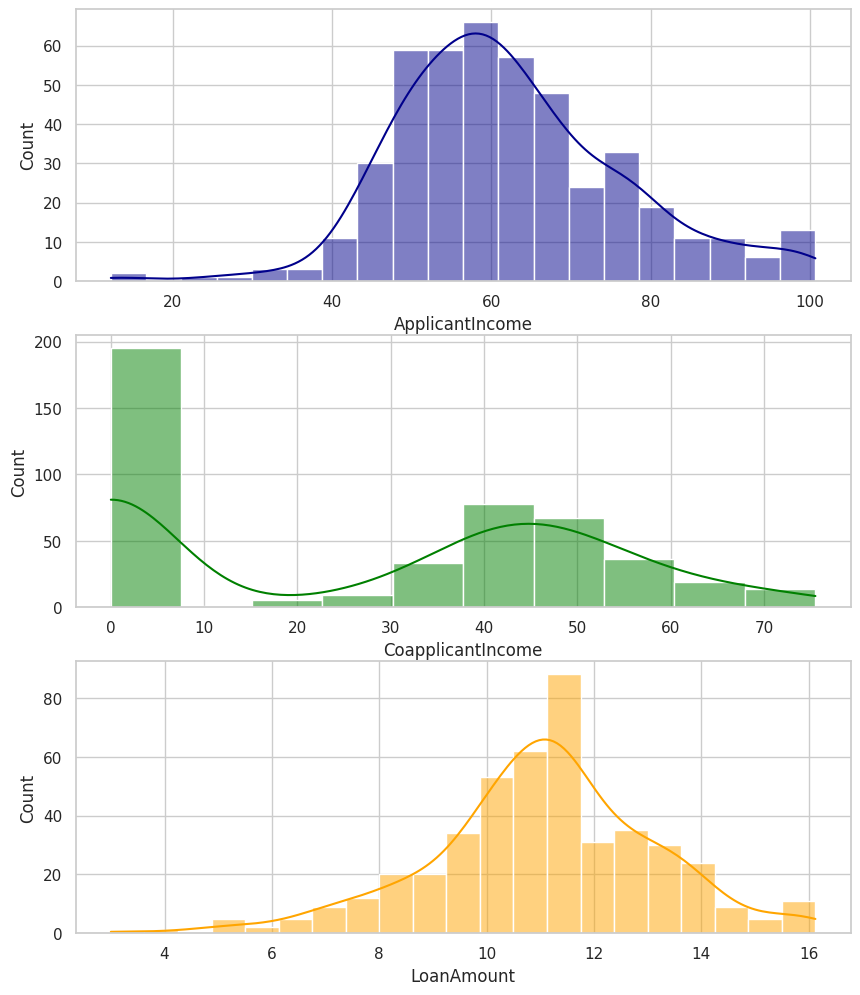

In [ ]:
# View the distribution of data in numerical columns (after feature engineering)
sns.set_style('whitegrid')
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

sns.histplot(data=df, x='ApplicantIncome', kde=True, ax=ax[0], color='darkblue')
sns.histplot(data=df, x='CoapplicantIncome', kde=True, ax=ax[1], color='green')
sns.histplot(data=df, x='LoanAmount', kde=True, ax=ax[2], color='orange')
plt.show()

#### **Quitar la columna'Loan_ID'**

In [ ]:
df = df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,76.478755,0.000000,11.313708,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,67.697858,38.832976,11.313708,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,54.772256,0.000000,8.124038,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,50.823223,48.559242,10.954451,360,1,Urban,Y
4,Male,No,0,Graduate,No,77.459667,0.000000,11.874342,360,1,Urban,Y


#### **Codificación de características categóricas**

In [ ]:
df = pd.get_dummies(df)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,76.478755,0.000000,11.313708,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,67.697858,38.832976,11.313708,1,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
2,54.772256,0.000000,8.124038,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
3,50.823223,48.559242,10.954451,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
4,77.459667,0.000000,11.874342,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
#Check post encoding column
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Loan_Amount_Term_12', 'Loan_Amount_Term_36',
       'Loan_Amount_Term_60', 'Loan_Amount_Term_84', 'Loan_Amount_Term_120',
       'Loan_Amount_Term_180', 'Loan_Amount_Term_240', 'Loan_Amount_Term_300',
       'Loan_Amount_Term_360', 'Loan_Amount_Term_480', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_N',
       'Loan_Status_Y'],
      dtype='object')

In [ ]:
#drop unneeded columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis=1)

In [ ]:
#rename some columns
df = df.rename(columns={'Gender_Male':'Gender',
                        'Married_Yes':'Married',
                        'Education_Graduate':'Education',
                        'Self_Employed_Yes':'Self_Employed',
                        'Loan_Status_Y':'Loan_Status'})

In [ ]:
#Check the post drop and rename columns again
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Gender', 'Married', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education', 'Self_Employed', 'Loan_Amount_Term_12',
       'Loan_Amount_Term_36', 'Loan_Amount_Term_60', 'Loan_Amount_Term_84',
       'Loan_Amount_Term_120', 'Loan_Amount_Term_180', 'Loan_Amount_Term_240',
       'Loan_Amount_Term_300', 'Loan_Amount_Term_360', 'Loan_Amount_Term_480',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status'],
      dtype='object')

In [ ]:
#Retrieve the number of rows and columns (post-encoding)
df.shape

(457, 26)

#### **Manejo de datos desbalanceados**

In [ ]:
#import the required libraries
from imblearn.over_sampling import SMOTE

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X, y = SMOTE().fit_resample(X, y)

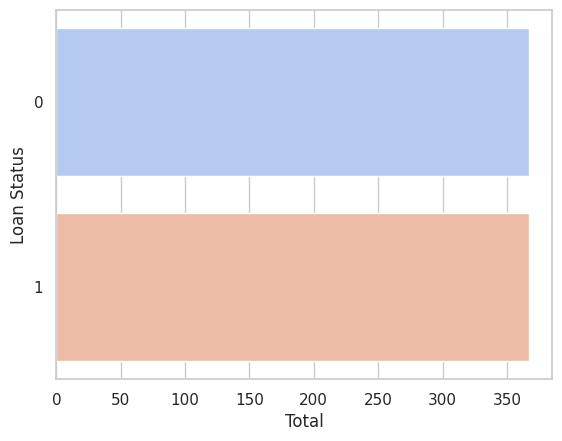

In [ ]:
#Create a count plot for column 'Loan_Status'
sns.set_theme(style='whitegrid')
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

#### **División de datos**

In [ ]:
#import some of the required libraries
import sklearn
from sklearn.model_selection import train_test_split

#split the dataset into 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(f'Total samples for training data is {round(X_train.shape[0]/(X_train.shape[0] + X_test.shape[0])*100)}%.')
print(f'Total samples for testing data is {round(X_test.shape[0]/(X_train.shape[0] + X_test.shape[0])*100)}%.')

Total samples for training data is 70%.
Total samples for testing data is 30%.


#### **Estandarización**

In [ ]:
#import the required libraries
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

col_num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
X_train[col_num] = ss.fit_transform(X_train[col_num])
X_test[col_num] = ss.fit_transform(X_test[col_num])

In [ ]:
#check the results of standardization X_train
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Loan_Amount_Term_84,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
536,0.441501,-0.970466,0.026876,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
259,0.849961,1.742360,-1.369302,1,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
137,-0.187486,-0.970466,-0.349525,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
227,1.498330,-0.970466,1.538209,1,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
687,-0.755988,0.620722,1.338713,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#check the results of standardization X_test
X_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Loan_Amount_Term_84,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
559,0.651710,-1.023152,-0.037476,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
33,-0.242007,-1.023152,-0.797418,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
275,2.121879,1.281941,0.966998,1,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
198,0.607947,-1.023152,0.186994,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
192,-0.580593,0.735286,0.073333,1,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


## **[Modelado]**

#### **Rendimiento de varios modelos en general**

In [ ]:
#import the required libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:03<00:00,  7.35it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.85,0.85,0.85,0.85,0.68
CalibratedClassifierCV,0.85,0.84,0.84,0.85,0.33
SVC,0.85,0.84,0.84,0.85,0.10
NuSVC,0.85,0.84,0.84,0.85,0.12
RidgeClassifier,0.85,0.84,0.84,0.84,0.04
LinearDiscriminantAnalysis,0.85,0.84,0.84,0.84,0.07
LinearSVC,0.85,0.84,0.84,0.84,0.14
LogisticRegression,0.84,0.83,0.83,0.83,0.07
RidgeClassifierCV,0.84,0.83,0.83,0.83,0.09


A continuación, los datos se volverán a entrenar manualmente con 5 tipos de modelos que consistentemente proporcionan buenos resultados, incluyendo: **CalibratedClassifierCV**, **SVC**, **LogisticRegression**, **RandomForestClassifier** y **LinearSVC**.


In [ ]:
#import the required libraries
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#### **CalibratedClassifierCV**

In [ ]:
CCCV = CalibratedClassifierCV()
CCCV = CCCV.fit(X_train, y_train)

# Predict the y variable
y_pred_CCCV = CCCV.predict(X_test)

# Check the accuracy of the trained and test models
score_train_CCCV = CCCV.score(X_train, y_train)
score_test_CCCV = CCCV.score(X_test, y_test)
print('Accuracy of CalibratedClassifier model on training data: ', score_train_CCCV)
print('Accuracy of CalibratedClassifier model on test data: ', score_test_CCCV)

Accuracy of CalibratedClassifier model on training data:  0.8635477582846004
Accuracy of CalibratedClassifier model on test data:  0.8461538461538461


#### **SVC**

In [ ]:
svc = SVC()
svc = svc.fit(X_train, y_train)

# Predict the y variable
y_pred_SVC = svc.predict(X_test)

# Check the accuracy of the trained and test models
score_train_SVC = svc.score(X_train, y_train)
score_test_SVC = svc.score(X_test, y_test)
print('Accuracy of SVC model on training data: ', score_train_SVC)
print('Accuracy of SVC model on test data: ', score_test_SVC)

Accuracy of SVC model on training data:  0.884990253411306
Accuracy of SVC model on test data:  0.8416289592760181


In [ ]:
# Find the best parameters for SVC using GridSearchCV
param_SVC = {'C': [1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf', 'sigmoid']}

search = GridSearchCV(SVC(), param_SVC)
search.fit(X_train, y_train)

print(search.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
# Train the model
SVC_new = SVC(C=1, gamma=1, kernel='rbf')
SVC_new = SVC_new.fit(X_train, y_train)

# Predict the variable y
y_pred_SVC_new = SVC_new.predict(X_test)

#### **LogisticRegression**

In [ ]:
LogReg = LogisticRegression()
LogReg = LogReg.fit(X_train, y_train)

# Predict the variable y
y_pred_LogReg = LogReg.predict(X_test)

# Check the accuracy of the trained and test model
score_train_LogReg = LogReg.score(X_train, y_train)
score_test_LogReg = LogReg.score(X_test, y_test)
print('Accuracy of the trained Logistic Regression model: ', score_train_LogReg)
print('Accuracy of the test Logistic Regression model: ', score_test_LogReg)


Accuracy of the trained Logistic Regression model:  0.8557504873294347
Accuracy of the test Logistic Regression model:  0.8416289592760181


In [ ]:
#find the best LogReg parameters with GridSearchCV
param_LogReg = {'penalty':['l1', 'l2'], 'C':np.logspace(-3,3,7)}

search = GridSearchCV(LogisticRegression(), param_LogReg)
search.fit(X_train, y_train)

print(search.best_params_)

{'C': 1.0, 'penalty': 'l2'}


In [ ]:
# Train the model
LogReg_new = LogisticRegression(C=1000.0, penalty='l2')
LogReg_new = LogReg_new.fit(X_train, y_train)

# Predict the variable y
y_pred_LogReg_new = LogReg_new.predict(X_test)

#### **RandomForestClassifier**

In [ ]:
RFC = RandomForestClassifier()
RFC = RFC.fit(X_train, y_train)

# Predict the variable y
y_pred_RFC = RFC.predict(X_test)

# Check the accuracy of the trained and test model
score_train_RFC = RFC.score(X_train, y_train)
score_test_RFC = RFC.score(X_test, y_test)
print('Accuracy of the trained RandomForestClassifier model: ', score_train_RFC)
print('Accuracy of the test RandomForestClassifier model: ', score_test_RFC)

Accuracy of the trained RandomForestClassifier model:  1.0
Accuracy of the test RandomForestClassifier model:  0.8461538461538461


In [ ]:
# Find the best parameters for RFC using GridSearchCV
param_RFC = {'n_estimators': [200, 500],
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth': [4, 5, 6, 7, 8],
             'criterion': ['gini', 'entropy']}

search = GridSearchCV(RandomForestClassifier(), param_RFC)
search.fit(X_train, y_train)

print(search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


In [ ]:
# Train the model
RFC_new = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt', n_estimators=200)
RFC_new = RFC_new.fit(X_train, y_train)

# Predict the variable y
y_pred_RFC_new = RFC_new.predict(X_test)

#### **LinearSVC**

In [ ]:
LSVC = LinearSVC()
LSVC = LSVC.fit(X_train, y_train)

# Predict the variable y
y_pred_LSVC = LSVC.predict(X_test)

# Check the accuracy of the trained and test model
score_train_LSVC = LSVC.score(X_train, y_train)
score_test_LSVC = LSVC.score(X_test, y_test)
print('Accuracy of the trained LinearSVC model: ', score_train_LSVC)
print('Accuracy of the test LinearSVC model: ', score_test_LSVC)


Accuracy of the trained LinearSVC model:  0.8596491228070176
Accuracy of the test LinearSVC model:  0.8461538461538461


## **[Evaluación]**

In [ ]:
# Accuracy of CalibratedClassifierCV model
score_train_CCCV = CCCV.score(X_train, y_train)
score_test_CCCV = CCCV.score(X_test, y_test)

# Accuracy of SVC model
score_train_SVC_new = SVC_new.score(X_train, y_train)
score_test_SVC_new = SVC_new.score(X_test, y_test)

# Accuracy of LogisticRegression model
score_train_LogReg_new = LogReg_new.score(X_train, y_train)
score_test_LogReg_new = LogReg_new.score(X_test, y_test)

# Accuracy of RandomForestClassifier model
score_train_RFC_new = RFC_new.score(X_train, y_train)
score_test_RFC_new = RFC_new.score(X_test, y_test)

# Accuracy of LinearSVC model
score_train_LSVC = LSVC.score(X_train, y_train)
score_test_LSVC = LSVC.score(X_test, y_test)


In [ ]:
accuracy = pd.DataFrame({'accuracy of Train':[score_train_CCCV, score_train_SVC_new,
                                         score_train_LogReg_new, score_train_RFC_new,
                                         score_train_LSVC],
                        'accuracy of Test':[score_test_CCCV, score_test_SVC_new,
                                       score_test_LogReg_new, score_test_RFC_new,
                                       score_test_LSVC]},
                       index = ['CalibratedClassifierCV', 'SVC',
                                'LogisticRegression', 'RandomForestClassifier',
                                'LinearSVC'])
accuracy

,accuracy of Train,accuracy of Test
CalibratedClassifierCV,0.86,0.85
SVC,0.98,0.84
LogisticRegression,0.86,0.84
RandomForestClassifier,0.97,0.82
LinearSVC,0.86,0.85


In [ ]:
# Create confusion matrices for each model
y_preds = [y_pred_CCCV, y_pred_SVC_new, y_pred_LogReg_new, y_pred_RFC_new, y_pred_LSVC]
model_names = ["CalibratedClassifierCV", "SVC", "LogisticRegression", "RandomForestClassifier", "LinearSVC"]
cms = []
for y_pred in y_preds:
    cm = confusion_matrix(y_test, y_pred)
    cms.append(cm)
# Define the class labels
class_labels = np.unique(y_test)

In [ ]:
#function to plot confusion matrix
def plot_confusion_matrix(cm, class_labels, model_name):
    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - ' + model_name)
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.grid(False)

    # Add labels to each cell
    thresh = cm.max() / 2
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, cm[i, j], ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.show()

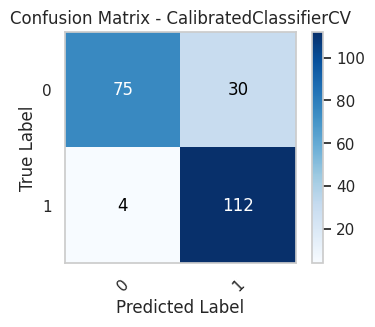

<Figure size 640x480 with 0 Axes>

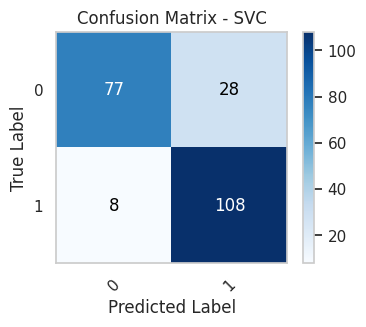

<Figure size 640x480 with 0 Axes>

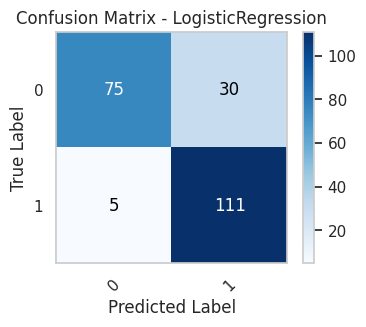

<Figure size 640x480 with 0 Axes>

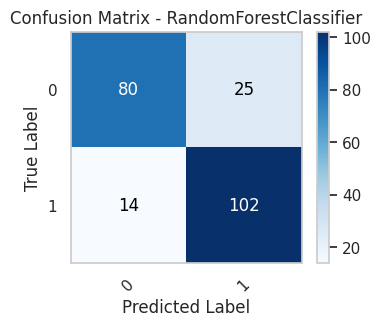

<Figure size 640x480 with 0 Axes>

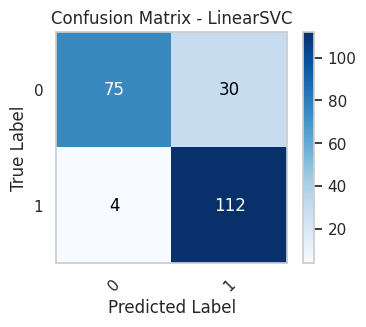

<Figure size 640x480 with 0 Axes>

In [ ]:
# Iterate over each model and plot the confusion matrix
for i, coma in enumerate(cms):
    plot_confusion_matrix(coma, class_labels, model_names[i])
    plt.subplots_adjust(hspace=0.1)

In [ ]:
for model_name, y_pred in zip(model_names, y_preds):
    # Get the ranking report
    classification_rep = classification_report(y_test, y_pred)

    # Print the classification report for each model
    print(f'Classification Report Model {model_name}:\n', classification_rep)

Classification Report Model CalibratedClassifierCV:
               precision    recall  f1-score   support

           0       0.95      0.71      0.82       105
           1       0.79      0.97      0.87       116

    accuracy                           0.85       221
   macro avg       0.87      0.84      0.84       221
weighted avg       0.87      0.85      0.84       221

Classification Report Model SVC:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81       105
           1       0.79      0.93      0.86       116

    accuracy                           0.84       221
   macro avg       0.85      0.83      0.83       221
weighted avg       0.85      0.84      0.83       221

Classification Report Model LogisticRegression:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81       105
           1       0.79      0.96      0.86       116

    accuracy                           0.84   

## **[Resultados y Elección del Modelo]**

Basándome en los resultados de los modelos evaluados, elegí el modelo CalibratedClassifierCV por las siguientes razones:

- La precisión general del modelo (accuracy) es de 0.85, lo cual indica que soy capaz de predecir correctamente el 85% de los casos.

- Muestro un equilibrio entre la precisión y la recuperación (recall) para ambas clases. La clase 0 tiene una precisión de 0.95 y un recall de 0.71, mientras que la clase 1 tiene una precisión de 0.79 y un recall de 0.97. Esto demuestra que soy capaz de clasificar correctamente tanto los casos negativos como los positivos.

- Los valores de F1-score para ambas clases también son altos. Obtengo un F1-score de 0.82 para la clase 0 y 0.87 para la clase 1. El F1-score combina la precisión y el recall en una sola métrica, y valores altos indican un buen equilibrio entre ambas medidas.

En resumen, el modelo CalibratedClassifierCV muestra un rendimiento sólido en términos de precisión, recall y F1-score para ambas clases. Por lo tanto, sería mi recomendación elegir este modelo para la tarea de clasificación de préstamos.

